In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import data from .csv file
df = pd.read_csv('/Users/jenniferlin/Rare_diseases_approved.csv')
df.head()

,Generic Name,Trade Name,Date Designated,Orphan Designation,Orphan Designation Status,FDA Orphan Approval Status,Approved Labeled Indication,Marketing Approval Date,Exclusivity End Date,"Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)",Sponsor Company,Sponsor Address 1,Sponsor Address 2,Sponsor City,Sponsor State,Sponsor Zip,Sponsor Country,CF Grid Key
0,bosentan,Tracleer,10/06/00,Treatment of pulmonary arterial hypertension,Designated/Approved,NaN,Treatment of pulmonary arterial hypertension.,11/20/2001,11/20/2008,NaN,Actelion Pharmaceuticals Ltd,1840 Gateway Drive,Suite 300,Cherry Hill,New Jersey,8002,United States,134200.0
1,bosentan,Tracleer,10/06/00,Treatment of pulmonary arterial hypertension,Designated/Approved,NaN,Treatment of pulmonary arterial hypertension (...,9/05/17,9/05/24,Treatment of pulmonary arterial hypertension (...,Actelion Pharmaceuticals Ltd,1840 Gateway Drive,Suite 300,Cherry Hill,New Jersey,8002,United States,134200.0
2,(tisagenlecleucel) Autologous T Cells transduc...,Kymriah (tisagenlecleucel),01/31/2014,For the treatment of Acute Lymphoblastic Leukemia,Designated/Approved,NaN,Treatment of patients up to 25 years of age wi...,08/30/2017,08/30/2024,Treatment of patients up to 25 years of age wi...,Novartis Pharmaceuticals Corporation,"One Health Plaza,",Bldg 315 - Room 3650B,East Hanover,New Jersey,7936,United States,415113.0
3,5-aminolevulinic acid,Gleolan,01/15/2013,Visualization of malignant tissue during surge...,Designated/Approved,NaN,Optical imaging agent indicated in patients wi...,6/06/17,6/06/24,Optical imaging agent indicated in patients wi...,NX Development Corporation,1827 South Bayshore Lane,NaN,Miami,Florida,33133,United States,387312.0
4,abatacept,Orencia,12/26/2017,Prevention of graft versus host disease,Designated/Approved,NaN,prophylaxis of acute graft versus host disease...,12/15/2021,NaN,NaN,Bristol-Myers Squibb Co.,P. O. Box 5326,NaN,Princeton,New Jersey,8543,United States,614117.0


In [3]:
#Check for any missing data in dataframe
missing_data = df.isnull()
missing_data.head()

,Generic Name,Trade Name,Date Designated,Orphan Designation,Orphan Designation Status,FDA Orphan Approval Status,Approved Labeled Indication,Marketing Approval Date,Exclusivity End Date,"Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)",Sponsor Company,Sponsor Address 1,Sponsor Address 2,Sponsor City,Sponsor State,Sponsor Zip,Sponsor Country,CF Grid Key
0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False


In [4]:
#Check how many missing values are there in the dataset
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Generic Name
False    1058
Name: Generic Name, dtype: int64

Trade Name
False    1013
True       45
Name: Trade Name, dtype: int64

Date Designated
False    1057
True        1
Name: Date Designated, dtype: int64

Orphan Designation
False    1057
True        1
Name: Orphan Designation, dtype: int64

Orphan Designation Status
False    1057
True        1
Name: Orphan Designation Status, dtype: int64

FDA Orphan Approval Status
True    1058
Name: FDA Orphan Approval Status, dtype: int64

Approved Labeled Indication
False    1000
True       58
Name: Approved Labeled Indication, dtype: int64

Marketing Approval Date
False    1057
True        1
Name: Marketing Approval Date, dtype: int64

Exclusivity End Date
False    961
True      97
Name: Exclusivity End Date, dtype: int64

Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)
False    549
True     509
Name: Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present), dtype

In [5]:
df.dtypes

Generic Name                                                                                   object
Trade Name                                                                                     object
Date Designated                                                                                object
Orphan Designation                                                                             object
Orphan Designation Status                                                                      object
FDA Orphan Approval Status                                                                    float64
Approved Labeled Indication                                                                    object
Marketing Approval Date                                                                        object
Exclusivity End Date                                                                           object
Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the 

In [6]:
#Drop "CF Grid Key" column as this was only for FDA office use only
df.drop(columns = ['CF Grid Key'], inplace = True)

#Drop "FDA Orphan Approval Status" column as this column contained missing values only
df.drop(['FDA Orphan Approval Status'], axis = 1, inplace = True)

#Drop "Sponsor Address 2" column (720 missing values in this column & most likely only need city & state info.)
df.drop(columns = ['Sponsor Address 2'], inplace = True)
df.head()

,Generic Name,Trade Name,Date Designated,Orphan Designation,Orphan Designation Status,Approved Labeled Indication,Marketing Approval Date,Exclusivity End Date,"Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)",Sponsor Company,Sponsor Address 1,Sponsor City,Sponsor State,Sponsor Zip,Sponsor Country
0,bosentan,Tracleer,10/06/00,Treatment of pulmonary arterial hypertension,Designated/Approved,Treatment of pulmonary arterial hypertension.,11/20/2001,11/20/2008,NaN,Actelion Pharmaceuticals Ltd,1840 Gateway Drive,Cherry Hill,New Jersey,8002,United States
1,bosentan,Tracleer,10/06/00,Treatment of pulmonary arterial hypertension,Designated/Approved,Treatment of pulmonary arterial hypertension (...,9/05/17,9/05/24,Treatment of pulmonary arterial hypertension (...,Actelion Pharmaceuticals Ltd,1840 Gateway Drive,Cherry Hill,New Jersey,8002,United States
2,(tisagenlecleucel) Autologous T Cells transduc...,Kymriah (tisagenlecleucel),01/31/2014,For the treatment of Acute Lymphoblastic Leukemia,Designated/Approved,Treatment of patients up to 25 years of age wi...,08/30/2017,08/30/2024,Treatment of patients up to 25 years of age wi...,Novartis Pharmaceuticals Corporation,"One Health Plaza,",East Hanover,New Jersey,7936,United States
3,5-aminolevulinic acid,Gleolan,01/15/2013,Visualization of malignant tissue during surge...,Designated/Approved,Optical imaging agent indicated in patients wi...,6/06/17,6/06/24,Optical imaging agent indicated in patients wi...,NX Development Corporation,1827 South Bayshore Lane,Miami,Florida,33133,United States
4,abatacept,Orencia,12/26/2017,Prevention of graft versus host disease,Designated/Approved,prophylaxis of acute graft versus host disease...,12/15/2021,NaN,NaN,Bristol-Myers Squibb Co.,P. O. Box 5326,Princeton,New Jersey,8543,United States


In [7]:
#Count the types of orphan designations (i.e. initial indications of the rare disease drugs)
df['Orphan Designation'].value_counts().to_frame()

,Orphan Designation
Treatment of multiple myeloma,29
Treatment of chronic lymphocytic leukemia,11
Treatment of chronic myelogenous leukemia,11
Treatment of patients with cystic fibrosis,10
Treatment of pulmonary arterial hypertension,9
...,...
For the Treatment of Dravet Syndrome,1
Treatment of human African trypanosomiasis (HAT) or sleeping sickness,1
Treatment of pediatric Clostridium difficile infection,1
For use in the mobilization of peripheral blood progenitor cells for collection in patients who will receive myeloablative or myelosuppressive chemotherapy.,1


In [8]:
#Rename column to value_counts for orphan designation
Initial_od_counts = df['Orphan Designation'].value_counts().to_frame()
Initial_od_counts.rename(columns = {'Orphan Designation': 'Initial_od_value_counts'}, inplace = True)
Initial_od_counts

,Initial_od_value_counts
Treatment of multiple myeloma,29
Treatment of chronic lymphocytic leukemia,11
Treatment of chronic myelogenous leukemia,11
Treatment of patients with cystic fibrosis,10
Treatment of pulmonary arterial hypertension,9
...,...
For the Treatment of Dravet Syndrome,1
Treatment of human African trypanosomiasis (HAT) or sleeping sickness,1
Treatment of pediatric Clostridium difficile infection,1
For use in the mobilization of peripheral blood progenitor cells for collection in patients who will receive myeloablative or myelosuppressive chemotherapy.,1


The orphan designation for rare disease drug that had the highest counts between 1983 till present was for the treatment of multiple myeloma

In [9]:
#Count types of approved labeled indications (i.e. final approved indications of the rare disease drugs)
df['Approved Labeled Indication'].value_counts().to_frame()

,Approved Labeled Indication
"REVLIMID in combination with a rituximab product, is indicated for the treatment of adult patients with previously treated marginal zone lymphoma (MZL).",3
Treatment of patients with Marginal Zone Lymphoma (MZL) who require systemic therapy and have received at least one prior anti-CD20-based therapy.,3
Treatment of adult patients with relapsed or refractory marginal zone lymphoma (MZL) who have received at least one anti-CD20-based regimen,3
Treatment of adult patients with large B-cell lymphoma that is refractory to first-line chemoimmunotherapy or that relapses within 12 months of first-line chemoimmunotherapy. Limitations of Use: Yescarta is not indicated for the treatment of patients with primary central nervous system lymphoma.,3
"Treatment of adult patients with relapsed or refractory large B-cell lymphoma after two or more lines of systemic therapy, including diffuse large B-cell lymphoma (DLBCL) not otherwise specified, primary mediastinal large B-cell lymphoma, high-grade B-cell lymphoma, and DLBCL arising from follicular lymphoma",3
...,...
EMPLICITI is indicated in combination with pomalidomide and dexamethasone for the treatment of adult patients with multiple myeloma who have received at least two prior therapies including lenalidomide and a proteasome inhibitor.,1
PROMACTA is indicated in combination with standard immunosuppressive therapy for the first-line treatment of adult and pediatric patients 2 years and older with severe aplastic anemia.,1
Treatment of patients with severe aplastic anemia who have had an insufficient response to immunosuppressive therapy.,1
"Treatment of thrombocytopenia in patients with chronic immune (idiopathic) thrombocytopenic purpura who have had an insufficient response to corticosteroids, immunoglobulins, or splenectomy",1


In [10]:
#Rename column to value_counts for approved labeled indications
Approved_li_counts = df['Approved Labeled Indication'].value_counts().to_frame()
Approved_li_counts.rename(columns = {'Approved Labeled Indication': 'Approved_li_value_counts'}, inplace = True)
Approved_li_counts

,Approved_li_value_counts
"REVLIMID in combination with a rituximab product, is indicated for the treatment of adult patients with previously treated marginal zone lymphoma (MZL).",3
Treatment of patients with Marginal Zone Lymphoma (MZL) who require systemic therapy and have received at least one prior anti-CD20-based therapy.,3
Treatment of adult patients with relapsed or refractory marginal zone lymphoma (MZL) who have received at least one anti-CD20-based regimen,3
Treatment of adult patients with large B-cell lymphoma that is refractory to first-line chemoimmunotherapy or that relapses within 12 months of first-line chemoimmunotherapy. Limitations of Use: Yescarta is not indicated for the treatment of patients with primary central nervous system lymphoma.,3
"Treatment of adult patients with relapsed or refractory large B-cell lymphoma after two or more lines of systemic therapy, including diffuse large B-cell lymphoma (DLBCL) not otherwise specified, primary mediastinal large B-cell lymphoma, high-grade B-cell lymphoma, and DLBCL arising from follicular lymphoma",3
...,...
EMPLICITI is indicated in combination with pomalidomide and dexamethasone for the treatment of adult patients with multiple myeloma who have received at least two prior therapies including lenalidomide and a proteasome inhibitor.,1
PROMACTA is indicated in combination with standard immunosuppressive therapy for the first-line treatment of adult and pediatric patients 2 years and older with severe aplastic anemia.,1
Treatment of patients with severe aplastic anemia who have had an insufficient response to immunosuppressive therapy.,1
"Treatment of thrombocytopenia in patients with chronic immune (idiopathic) thrombocytopenic purpura who have had an insufficient response to corticosteroids, immunoglobulins, or splenectomy",1


The highest counts of final approved indication for rare disease drugs spanned across several different clinical indications as shown above - it often ended up with more indication details than the initial orphan designation phase.

In [11]:
#To observe the last 5 rows of the data
df.tail()

,Generic Name,Trade Name,Date Designated,Orphan Designation,Orphan Designation Status,Approved Labeled Indication,Marketing Approval Date,Exclusivity End Date,"Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)",Sponsor Company,Sponsor Address 1,Sponsor City,Sponsor State,Sponsor Zip,Sponsor Country
1053,zanubrutinib,Brukinsa,08/24/2020,Treatment of nodal marginal zone lymphoma,Designated/Approved,Treatment of adult patients with relapsed or r...,09/14/2021,09/14/2028,Treatment of adult patients with relapsed or r...,"BeiGene USA, Inc.",2955 Campus Drive,San Mateo,California,94403,United States
1054,zidovudine,Retrovir,07/17/1985,Treatment of AIDS,Designated/Approved,Management of certain adult patients with symp...,03/19/1987,03/19/1994,NaN,Glaxo Wellcome Inc.,5 Moore Drive,Research Triangle Park,North Carolina,27709,United States
1055,Zinc acetate,Galzin,11/06/85,Treatment of Wilson's disease.,Designated/Approved,For maintenance treatment of patients with Wil...,01/28/1997,01/28/2004,NaN,Lemmon Company,1510 Delp Drive,Kulpsville,Pennsylvania,19443,United States
1056,Zoledronate,"Zometa, Zabel",08/18/2000,Treatment of tumor induced hypercalcemia.,Designated/Approved,Treatment of hypercalcemia of malignancy.,08/20/2001,08/20/2008,NaN,Novartis Pharmaceuticals Corp.,59 Route 10,East Hanover,New Jersey,7936,United States
1057,Note: Exclusivity Protected Indications are sh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#To see all data entries of the Generic Name column
df['Generic Name'].unique()

array(['bosentan',
       '(tisagenlecleucel) Autologous T Cells transduced with lentiviral vector containing a chimeric antigen receptor directed against CD19',
       '5-aminolevulinic acid', 'abatacept', 'acalabrutinib',
       'acetylcysteine',
       'acetylcysteine effervescent tablets for oral solution',
       'acyclovir', 'adalimumab', 'afamelanotide', 'afatinib',
       'agalsidase beta', 'Albendazole', 'Aldesleukin', 'alectinib',
       'alemtuzumab', 'Alglucerase injection', 'alirocumab',
       'Alitretinoin',
       'allogeneic cultured keratinocytes and dermal fibroblasts in murine collagen-dsat',
       'allogeneic processed thymus tissue-agdc', 'Allopurinol sodium',
       'alpelisib', 'Alpha1-proteinase inhibitor (human)', 'Altretamine',
       'Amantadine hydrochloride', 'ambrisentan',
       'amifampridine phosphate', 'Amifostine', 'Aminosalicylic acid',
       'Amiodarone HCl', 'Amphotericin B lipid complex', 'Anagrelide',
       'anakinra', 'ansuvimab-zykl', 'anth

In [13]:
#Drop last row as no data present apart from the caption about exclusivity protected indications
df.drop([1057], inplace = True)
df.tail()

,Generic Name,Trade Name,Date Designated,Orphan Designation,Orphan Designation Status,Approved Labeled Indication,Marketing Approval Date,Exclusivity End Date,"Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)",Sponsor Company,Sponsor Address 1,Sponsor City,Sponsor State,Sponsor Zip,Sponsor Country
1052,zanubrutinib,Brukinsa,08/24/2020,Treatment of extranodal marginal zone lymphoma...,Designated/Approved,Treatment of adult patients with relapsed or r...,09/14/2021,09/14/2028,Treatment of adult patients with relapsed or r...,"BeiGene USA, Inc.",2955 Campus Drive,San Mateo,California,94403,United States
1053,zanubrutinib,Brukinsa,08/24/2020,Treatment of nodal marginal zone lymphoma,Designated/Approved,Treatment of adult patients with relapsed or r...,09/14/2021,09/14/2028,Treatment of adult patients with relapsed or r...,"BeiGene USA, Inc.",2955 Campus Drive,San Mateo,California,94403,United States
1054,zidovudine,Retrovir,07/17/1985,Treatment of AIDS,Designated/Approved,Management of certain adult patients with symp...,03/19/1987,03/19/1994,NaN,Glaxo Wellcome Inc.,5 Moore Drive,Research Triangle Park,North Carolina,27709,United States
1055,Zinc acetate,Galzin,11/06/85,Treatment of Wilson's disease.,Designated/Approved,For maintenance treatment of patients with Wil...,01/28/1997,01/28/2004,NaN,Lemmon Company,1510 Delp Drive,Kulpsville,Pennsylvania,19443,United States
1056,Zoledronate,"Zometa, Zabel",08/18/2000,Treatment of tumor induced hypercalcemia.,Designated/Approved,Treatment of hypercalcemia of malignancy.,08/20/2001,08/20/2008,NaN,Novartis Pharmaceuticals Corp.,59 Route 10,East Hanover,New Jersey,7936,United States


In [14]:
#change Date Designated & Marketing Approval Date columns to datetime format
df.loc[:, ("Date Designated", "Marketing Approval Date")] = df.loc[:, ("Date Designated", "Marketing Approval Date")].astype("datetime64")
df.head()

,Generic Name,Trade Name,Date Designated,Orphan Designation,Orphan Designation Status,Approved Labeled Indication,Marketing Approval Date,Exclusivity End Date,"Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)",Sponsor Company,Sponsor Address 1,Sponsor City,Sponsor State,Sponsor Zip,Sponsor Country
0,bosentan,Tracleer,2000-10-06 00:00:00,Treatment of pulmonary arterial hypertension,Designated/Approved,Treatment of pulmonary arterial hypertension.,2001-11-20 00:00:00,11/20/2008,NaN,Actelion Pharmaceuticals Ltd,1840 Gateway Drive,Cherry Hill,New Jersey,8002,United States
1,bosentan,Tracleer,2000-10-06 00:00:00,Treatment of pulmonary arterial hypertension,Designated/Approved,Treatment of pulmonary arterial hypertension (...,2017-09-05 00:00:00,9/05/24,Treatment of pulmonary arterial hypertension (...,Actelion Pharmaceuticals Ltd,1840 Gateway Drive,Cherry Hill,New Jersey,8002,United States
2,(tisagenlecleucel) Autologous T Cells transduc...,Kymriah (tisagenlecleucel),2014-01-31 00:00:00,For the treatment of Acute Lymphoblastic Leukemia,Designated/Approved,Treatment of patients up to 25 years of age wi...,2017-08-30 00:00:00,08/30/2024,Treatment of patients up to 25 years of age wi...,Novartis Pharmaceuticals Corporation,"One Health Plaza,",East Hanover,New Jersey,7936,United States
3,5-aminolevulinic acid,Gleolan,2013-01-15 00:00:00,Visualization of malignant tissue during surge...,Designated/Approved,Optical imaging agent indicated in patients wi...,2017-06-06 00:00:00,6/06/24,Optical imaging agent indicated in patients wi...,NX Development Corporation,1827 South Bayshore Lane,Miami,Florida,33133,United States
4,abatacept,Orencia,2017-12-26 00:00:00,Prevention of graft versus host disease,Designated/Approved,prophylaxis of acute graft versus host disease...,2021-12-15 00:00:00,NaN,NaN,Bristol-Myers Squibb Co.,P. O. Box 5326,Princeton,New Jersey,8543,United States


In [15]:
#Calculate the time difference between date designated & marketing approval date
df.loc[:, "Time_diff"] = (df.loc[:, 'Marketing Approval Date'] - df.loc[:, 'Date Designated'])
df.head()

,Generic Name,Trade Name,Date Designated,Orphan Designation,Orphan Designation Status,Approved Labeled Indication,Marketing Approval Date,Exclusivity End Date,"Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)",Sponsor Company,Sponsor Address 1,Sponsor City,Sponsor State,Sponsor Zip,Sponsor Country,Time_diff
0,bosentan,Tracleer,2000-10-06 00:00:00,Treatment of pulmonary arterial hypertension,Designated/Approved,Treatment of pulmonary arterial hypertension.,2001-11-20 00:00:00,11/20/2008,NaN,Actelion Pharmaceuticals Ltd,1840 Gateway Drive,Cherry Hill,New Jersey,8002,United States,410 days
1,bosentan,Tracleer,2000-10-06 00:00:00,Treatment of pulmonary arterial hypertension,Designated/Approved,Treatment of pulmonary arterial hypertension (...,2017-09-05 00:00:00,9/05/24,Treatment of pulmonary arterial hypertension (...,Actelion Pharmaceuticals Ltd,1840 Gateway Drive,Cherry Hill,New Jersey,8002,United States,6178 days
2,(tisagenlecleucel) Autologous T Cells transduc...,Kymriah (tisagenlecleucel),2014-01-31 00:00:00,For the treatment of Acute Lymphoblastic Leukemia,Designated/Approved,Treatment of patients up to 25 years of age wi...,2017-08-30 00:00:00,08/30/2024,Treatment of patients up to 25 years of age wi...,Novartis Pharmaceuticals Corporation,"One Health Plaza,",East Hanover,New Jersey,7936,United States,1307 days
3,5-aminolevulinic acid,Gleolan,2013-01-15 00:00:00,Visualization of malignant tissue during surge...,Designated/Approved,Optical imaging agent indicated in patients wi...,2017-06-06 00:00:00,6/06/24,Optical imaging agent indicated in patients wi...,NX Development Corporation,1827 South Bayshore Lane,Miami,Florida,33133,United States,1603 days
4,abatacept,Orencia,2017-12-26 00:00:00,Prevention of graft versus host disease,Designated/Approved,prophylaxis of acute graft versus host disease...,2021-12-15 00:00:00,NaN,NaN,Bristol-Myers Squibb Co.,P. O. Box 5326,Princeton,New Jersey,8543,United States,1450 days


In [16]:
#To obtain the average time required from designation date to marketing approval date
df_time_diff_avg = df["Time_diff"].mean()
df_time_diff_avg

Timedelta('1932 days 06:17:22.194891200')

In [17]:
#Quick overview of overall statistical summary of the whole dataset 
#for the time required from designation date to marketing approval date
df.describe()

,Time_diff
count,1057
mean,1932 days 06:17:22.194891200
std,1842 days 08:42:36.159085920
min,-2000 days +00:00:00
25%,693 days 00:00:00
50%,1480 days 00:00:00
75%,2590 days 00:00:00
max,12215 days 00:00:00


The average time required for a rare disease drug to progress from the initial designation phase to the final approval for marketing was about 1932 days (~5 years). The datatset was obtained from FDA for the period from 1983 till present.

In [18]:
#Change the data type for Generic name and Time_diff columns
df.loc[:, "Generic Name"] = df.loc[:, "Generic Name"].astype("string")
df.loc[:, "Time_diff"] = df.loc[:, "Time_diff"].dt.days.astype("int")
df.dtypes

Generic Name                                                                                  string
Trade Name                                                                                    object
Date Designated                                                                               object
Orphan Designation                                                                            object
Orphan Designation Status                                                                     object
Approved Labeled Indication                                                                   object
Marketing Approval Date                                                                       object
Exclusivity End Date                                                                          object
Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)    object
Sponsor Company                                                                            

In [19]:
#Sort the data according to column Time_diff in descending order
df_new = df.sort_values(['Time_diff'], ascending = False, axis = 0, inplace = True)
df_new_top10 = df.head(10)
df_new_top10

,Generic Name,Trade Name,Date Designated,Orphan Designation,Orphan Designation Status,Approved Labeled Indication,Marketing Approval Date,Exclusivity End Date,"Exclusivity Protected Indication * (Shown for approvals from Jan. 1, 2013, to the present)",Sponsor Company,Sponsor Address 1,Sponsor City,Sponsor State,Sponsor Zip,Sponsor Country,Time_diff
984,Tiopronin,Thiola,1986-01-17 00:00:00,Prevention of cystine nephrolithiasis in patie...,Designated/Approved,"THIOLA EC is indicated, in combination with hi...",2019-06-28 00:00:00,06/28/2026,NaN,Mission Pharmacal Company,P.O. Box 786099,San Antonio,Texas,78278,United States,12215
985,Tiopronin,Thiola,1986-01-17 00:00:00,Prevention of cystine nephrolithiasis in patie...,Designated/Approved,"THIOLA is indicated, in combination with high ...",2019-06-28 00:00:00,06/28/2026,Indicated in combination with high fluid intak...,Mission Pharmacal Company,P.O. Box 786099,San Antonio,Texas,78278,United States,12215
22,agalsidase beta,Fabrazyme,1988-01-19 00:00:00,Treatment of Fabry's disease.,Designated/Approved,treatment of adult and pediatric patients 2 ye...,2021-03-11 00:00:00,3/11/28,treatment of pediatric patients 2 years of age...,Genzyme Corporation,50 Binney Street,Cambridge,Massachusetts,2142,United States,12105
741,Pegaspargase,Oncaspar; Asparlas,1989-10-20 00:00:00,Treatment of acute lymphocytic leukemia.,Designated/Approved,ASPARLAS is indicated as a component of a mult...,2018-12-20 00:00:00,NaN,NaN,Servier Pharmaceuticals LLC,200 Pier Four Blvd,Boston,Massachusetts,2210,United States,10653
394,factor XIII concentrate (human),Corifact,1985-01-16 00:00:00,Treatment of congenital factor XIII deficiency,Designated/Approved,Indicated for routine prophylactic treatment a...,2013-01-24 00:00:00,01/24/2020,Peri-operative management of surgical bleeding...,CSL Behring LLC,1020 First Ave.,King of Prussia,Pennsylvania,19406,United States,10235
181,C1 Esterase Inhibitor Subcutaneous [Human],HAEGARDA,1992-10-16 00:00:00,Prevention and/or treatment of acute attacks o...,Designated/Approved,HAEGARDA is a plasma-derived concentrate of C1...,2020-09-24 00:00:00,NaN,NaN,CSL Behring LLC,1020 First Avenue,King of Prussia,Pennsylvania,19406,United States,10205
102,baclofen,OZOBAX,1991-12-16 00:00:00,Treatment of intractable spasticity due to mul...,Designated/Approved,Treatment of spasticity resulting from multipl...,2019-09-18 00:00:00,NaN,NaN,"Metacel Pharmaceuticals, LLC",244 E Washington Street,Athens,Georgia,30601,United States,10138
153,botulinum toxin type A,Botox,1991-12-06 00:00:00,Treatment of dynamic muscle contracture in ped...,Designated/Approved,BOTOX is indicated for the treatment of upper ...,2019-06-20 00:00:00,06/20/2026,For the treatment of upper limb spasticity in ...,"Allergan, Inc.",2525 Dupont Drive,Irvine,California,92623,United States,10058
847,rituximab,Rituxan,1994-06-13 00:00:00,Treatment of non-Hodgkin's B-cell lymphoma,Designated/Approved,treatment of pediatric patients aged 6 months ...,2021-12-02 00:00:00,NaN,NaN,"Genentech, Inc.","1 DNA Way, MS 242",South San Francisco,California,94080,United States,10034
240,coagulation factor IX (recombinant),BeneFIX,1994-10-03 00:00:00,Treatment of hemophilia B,Designated/Approved,Routine prophylaxis to reduce the frequency of...,2021-10-05 00:00:00,NaN,NaN,"Wyeth Pharmaceuticals LLC, a subsidiary of Pfi...",235 E. 42nd St 219/9/1,New York,New York,10017,United States,9864


In [20]:
#Create another dataframe with only Generic Name and Time_diff columns
df_new_top10_1 = df_new_top10[['Generic Name', 'Time_diff']]
df_new_top10_1

,Generic Name,Time_diff
984,Tiopronin,12215
985,Tiopronin,12215
22,agalsidase beta,12105
741,Pegaspargase,10653
394,factor XIII concentrate (human),10235
181,C1 Esterase Inhibitor Subcutaneous [Human],10205
102,baclofen,10138
153,botulinum toxin type A,10058
847,rituximab,10034
240,coagulation factor IX (recombinant),9864


In [21]:
#Use Generic name column as the index instead
df_new_top10_1.set_index('Generic Name', inplace = True)
df_new_top10_1

,Time_diff
Generic Name,
Tiopronin,12215
Tiopronin,12215
agalsidase beta,12105
Pegaspargase,10653
factor XIII concentrate (human),10235
C1 Esterase Inhibitor Subcutaneous [Human],10205
baclofen,10138
botulinum toxin type A,10058
rituximab,10034


Text(0.5, 1.0, 'Top 10 rare disease drugs with the longest time required to reach marketing approval')

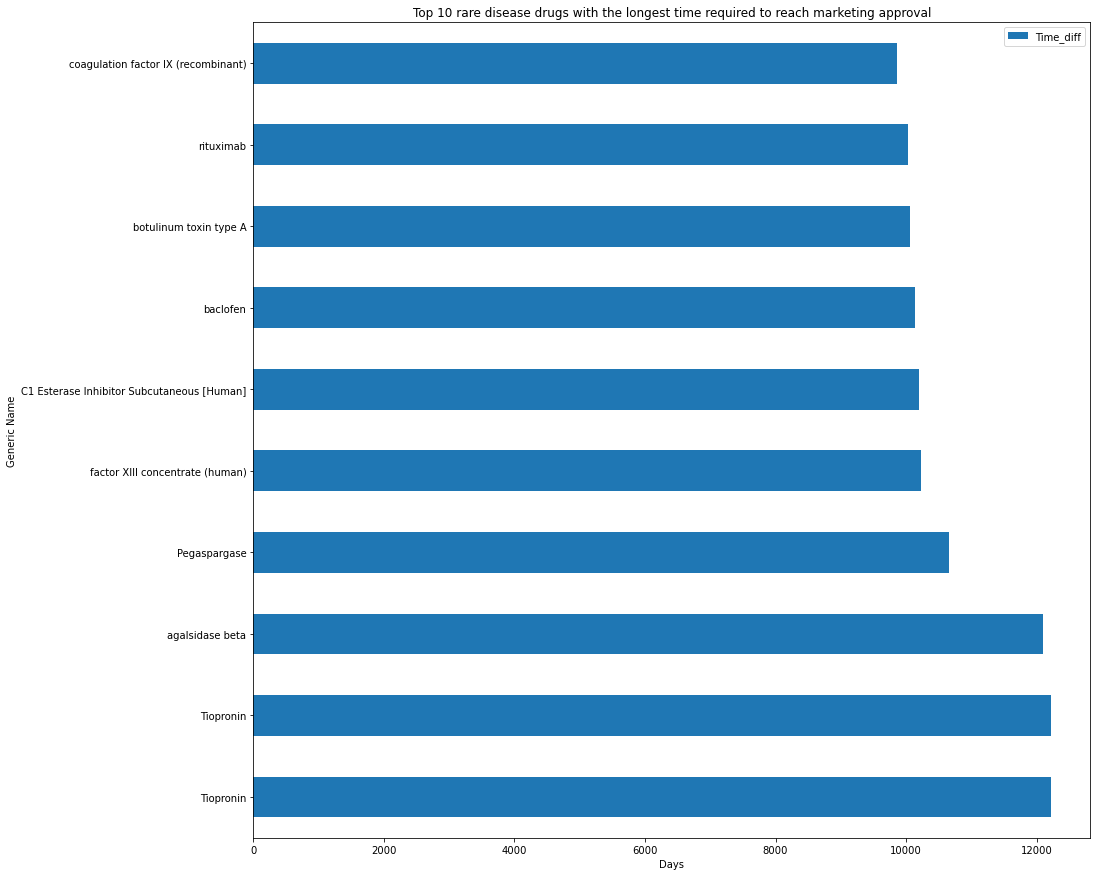

In [22]:
#Plot horizontal bar graph of the top 10 rare disease drugs with longest time taken to reach marketing approval
df_new_top10_1.plot(kind = 'barh', figsize = (15, 15))
plt.xlabel('Days')
plt.title('Top 10 rare disease drugs with the longest time required to reach marketing approval')

In [23]:
#To add more columns to df_new_top10_1 dataframe to show more information
df_new_top10_2 = df_new_top10[['Generic Name', 'Trade Name', 'Date Designated', 'Marketing Approval Date', 'Time_diff', 'Approved Labeled Indication']]
df_new_top10_2

,Generic Name,Trade Name,Date Designated,Marketing Approval Date,Time_diff,Approved Labeled Indication
984,Tiopronin,Thiola,1986-01-17 00:00:00,2019-06-28 00:00:00,12215,"THIOLA EC is indicated, in combination with hi..."
985,Tiopronin,Thiola,1986-01-17 00:00:00,2019-06-28 00:00:00,12215,"THIOLA is indicated, in combination with high ..."
22,agalsidase beta,Fabrazyme,1988-01-19 00:00:00,2021-03-11 00:00:00,12105,treatment of adult and pediatric patients 2 ye...
741,Pegaspargase,Oncaspar; Asparlas,1989-10-20 00:00:00,2018-12-20 00:00:00,10653,ASPARLAS is indicated as a component of a mult...
394,factor XIII concentrate (human),Corifact,1985-01-16 00:00:00,2013-01-24 00:00:00,10235,Indicated for routine prophylactic treatment a...
181,C1 Esterase Inhibitor Subcutaneous [Human],HAEGARDA,1992-10-16 00:00:00,2020-09-24 00:00:00,10205,HAEGARDA is a plasma-derived concentrate of C1...
102,baclofen,OZOBAX,1991-12-16 00:00:00,2019-09-18 00:00:00,10138,Treatment of spasticity resulting from multipl...
153,botulinum toxin type A,Botox,1991-12-06 00:00:00,2019-06-20 00:00:00,10058,BOTOX is indicated for the treatment of upper ...
847,rituximab,Rituxan,1994-06-13 00:00:00,2021-12-02 00:00:00,10034,treatment of pediatric patients aged 6 months ...
240,coagulation factor IX (recombinant),BeneFIX,1994-10-03 00:00:00,2021-10-05 00:00:00,9864,Routine prophylaxis to reduce the frequency of...


In [24]:
#Showing detailed approved labeled indications for the top 10 rare disease drugs that took the longest time to reach markets
df_new_top10_2['Approved Labeled Indication'].unique()

array(['THIOLA EC is indicated, in combination with high fluid intake, alkali, and diet modification, for the prevention of cystine stone formation in adults and pediatric patients 20 kg and greater with severe homozygous cystinuria, who are not responsive to these measures alone.',
       'THIOLA is indicated, in combination with high fluid intake, alkali, and diet modification, for the prevention of cystine stone formation in adults and pediatric patients 20 kg and greater with severe homozygous cystinuria, who are not responsive to these measures alone.',
       'treatment of adult and pediatric patients 2 years of age and older with confirmed Fabry disease',
       'ASPARLAS is indicated as a component of a multi-agent chemotherapeutic regimen for the treatment of acute lymphoblastic leukemia in pediatric and young adult patients age 1 month to 21 years.',
       'Indicated for routine prophylactic treatment and peri-operative management of surgical bleeding in adult and pediatric 

The horizontal bar graph above displayed the top ten rare disease drugs with the longest time taken to reach the market. The data for Tiopronin appeared to be duplicates, but note that the two were formulated differently as one of them was the enteric-coated (EC) version (marketed as delayed-release tablets under the actual trade name of "Thiola EC", but recorded in the dataset as "Thiola" only), while the other one was the immediate-release form (Thiola).